## 📈 Step 5.2 (Improved): SARIMA Model for Power Consumption Forecasting
This notebook applies a **seasonal ARIMA** model (SARIMA) to forecast `Total_PowerConsumption` using its past values with daily seasonality.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set(style="whitegrid")

## 📥 Load dataset and resample to hourly average

In [19]:
df = pd.read_csv('../Datasets/cleaned_powerconsumption.csv', parse_dates=['Datetime'], index_col='Datetime')
df_hourly = df['Total_PowerConsumption'].resample('H').mean().dropna()

C:\Users\Bahae\AppData\Local\Temp\ipykernel_2356\3136603284.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Total_PowerConsumption'].resample('H').mean().dropna()


## ✂️ Split into training and testing sets

In [20]:
split_point = int(len(df_hourly) * 0.8)
train = df_hourly.iloc[:split_point]
test = df_hourly.iloc[split_point:]

## ⚙️ Fit SARIMA Model (ARIMA + Seasonality)
- `seasonal_order=(1, 0, 1, 24)` assumes daily pattern in hourly data

In [21]:
model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 1, 24))
model_fit = model.fit(disp=True, maxiter=50)


In [22]:
print(model_fit.summary())


                                      SARIMAX Results                                       
Dep. Variable:               Total_PowerConsumption   No. Observations:                 6988
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 24)   Log Likelihood              -59464.677
Date:                              Sat, 10 May 2025   AIC                         118937.355
Time:                                      00:14:15   BIC                         118964.763
Sample:                                  01-01-2017   HQIC                        118946.800
                                       - 10-19-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.001    979.155      0.000       0.997       1.001
ar.S.L24       0.99

## 📉 Forecast and evaluate RMSE

In [23]:
y_pred = model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, y_pred))
print(f"SARIMA RMSE: {rmse:.2f}")

SARIMA RMSE: 3973.91


## 📊 Plot: Actual vs Forecast (SARIMA)

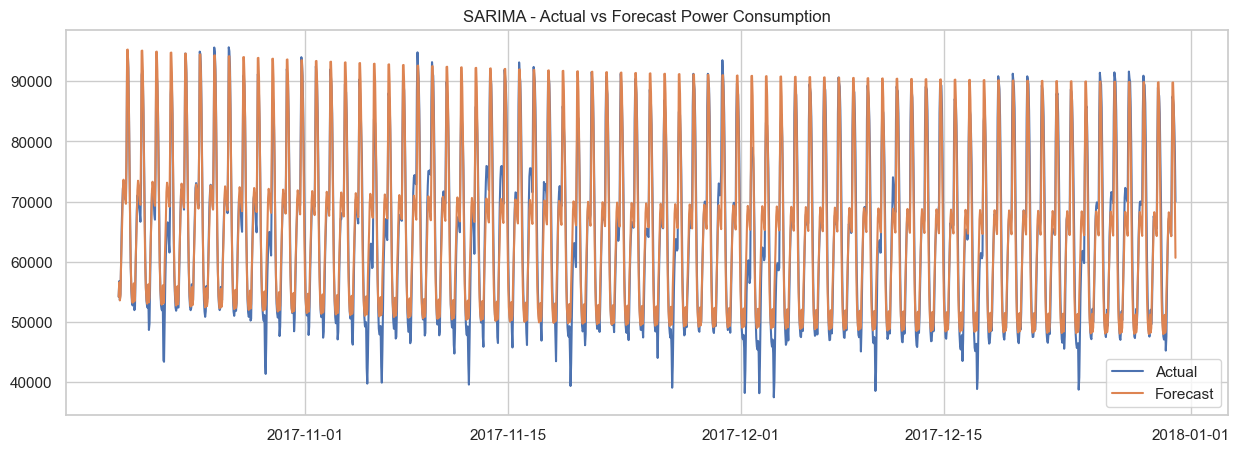

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, y_pred, label='Forecast')
plt.title("SARIMA - Actual vs Forecast Power Consumption")
plt.legend()
plt.show()